<a href="https://colab.research.google.com/github/plural-ok/Japan-Term-Project-Repo/blob/main/JPN_Term_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import math
import io
import os

import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import levene

from statsmodels.stats.stattools import durbin_watson
from sklearn import tree
from sklearn import neighbors as nn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import neighbors as nn
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

A brief outline of what I am looking to determine.
Using inflation rate and whatever good data sources I can find, I am looking to determine Public Approval of Government in Japan using a variety of different models.


Preprocessing to format data.

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

pathname = "/content/drive/My Drive/JPN Term Proj/"
os.chdir(pathname)

Mounted at /content/drive


In [3]:
filename = "rmain.xlsx" #Potential -> "hor_elections.xlsx"
dt1 = pd.read_excel(filename, sheet_name="ApprovalRate")
dt2 = pd.read_excel(filename, sheet_name="Predictors")
##filename = "pdy_jp.xlsx"
##dtp = pd.read_excel(filename, sheet_name="info_parties2")


In [4]:
dt = pd.merge(dt1,dt2,  on='Time')
dt.columns


Index(['Time', 'appr', 'dppr', 'ifr', 'unemp'], dtype='object')

In [5]:
dt


,Time,appr,dppr,ifr,unemp
0,2019-01-01,43,35,0.2,5.0
1,2019-02-01,44,37,0.2,4.7
2,2019-03-01,42,36,0.5,4.9
3,2019-04-01,47,35,0.9,4.8
4,2019-05-01,48,32,0.7,4.5
...,...,...,...,...,...
66,2024-08-01,25,55,3.0,4.9
67,2024-09-01,20,60,2.5,4.8
68,2024-10-01,44,32,2.3,4.9
69,2024-11-01,41,35,2.9,4.9


Correlation Measures

In [6]:
print(ss.spearmanr(dt["ifr"], dt["appr"]))
print(ss.spearmanr(dt["unemp"], dt["appr"]))

SignificanceResult(statistic=-0.26628535913458307, pvalue=0.024792002984174475)
SignificanceResult(statistic=-0.025480823312991244, pvalue=0.832943117446687)


First Model

In [38]:
X = dt[["ifr"]]
y = dt["appr"]


In [39]:
mod1 = LinearRegression()

mod1.fit(X, y)

LinearRegression()

In [47]:
stat, p = shapiro(X)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.913, p=0.000


In [64]:
stat, p = levene(residuals, dt[["ifr"]].values.flatten()) # *groups unpacks multiple arrays
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=86.233, p=0.000


In [63]:
residuals = mod1.predict(X) - y
dw_stat = durbin_watson(residuals)
print('Durbin-Watson statistic:', dw_stat)

Durbin-Watson statistic: 0.4387521068310533


In [26]:
# Accuracy on Data
exps = mod1.predict(X)
exp = np.round(exps)
obs = y
obs = np.round(obs)


print("\n\Accuracy")
print("Out of",len(exp),"trials, this model was accurate for",sum(exp==obs),"observations in the training set. This is a rate of",sum(exp==obs)/len(exp))



\Accuracy
Out of 71 trials, this model was accurate for 3 observations in the training set. This is a rate of 0.04225352112676056


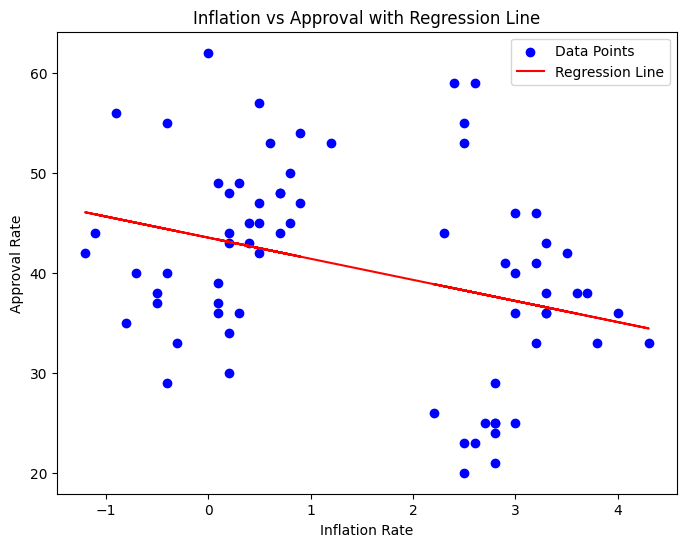

In [27]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(dt["ifr"], dt["appr"], color='blue', label='Data Points')

# Plot the regression line
plt.plot(X, mod1.predict(X), color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Inflation Rate')
plt.ylabel('Approval Rate')
plt.title('Inflation vs Approval with Regression Line')
plt.legend()
plt.show()

Second Model

In [66]:
X = dt[["unemp"]]
y = dt["appr"]


In [67]:
mod2 = LinearRegression()

mod2.fit(X, y)

LinearRegression()

In [68]:
stat, p = shapiro(X)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.938, p=0.002


In [70]:
residuals = mod2.predict(X) - y
stat, p = levene(residuals, dt[["ifr"]].values.flatten()) # *groups unpacks multiple arrays
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=100.747, p=0.000


In [71]:

dw_stat = durbin_watson(residuals)
print('Durbin-Watson statistic:', dw_stat)

Durbin-Watson statistic: 0.40259601967529607


In [30]:
# Accuracy on Data
exps = mod2.predict(X)
exp = np.round(exps)
obs = y
obs = np.round(obs)


print("\n\Accuracy")
print("Out of",len(exp),"trials, this model was accurate for",sum(exp==obs),"observations in the training set. This is a rate of",sum(exp==obs)/len(exp))



\Accuracy
Out of 71 trials, this model was accurate for 2 observations in the training set. This is a rate of 0.028169014084507043


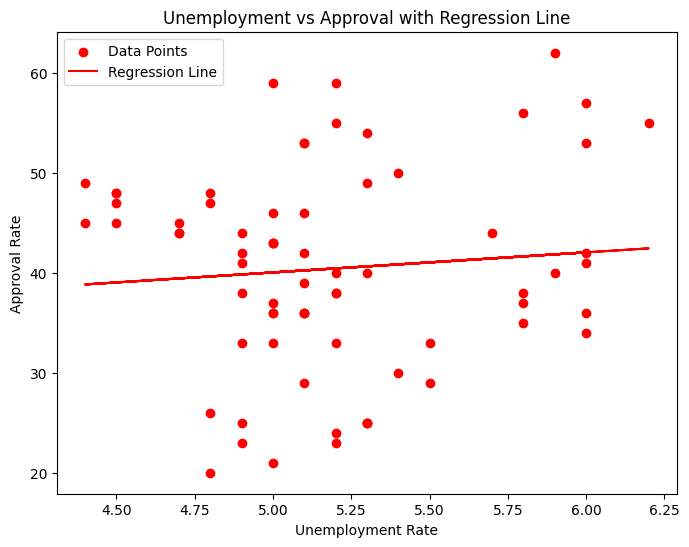

In [31]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(dt["unemp"], dt["appr"], color='red', label='Data Points')

# Plot the regression line
plt.plot(X, mod2.predict(X), color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Unemployment Rate')
plt.ylabel('Approval Rate')
plt.title('Unemployment vs Approval with Regression Line')
plt.legend()
plt.show()

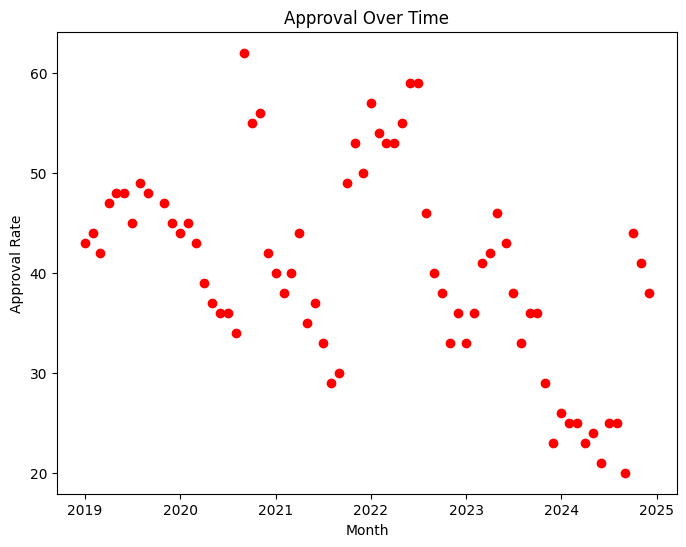

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(dt["Time"], dt["appr"], color='red')
plt.xlabel('Month')
plt.ylabel('Approval Rate')
plt.title('Approval Over Time')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


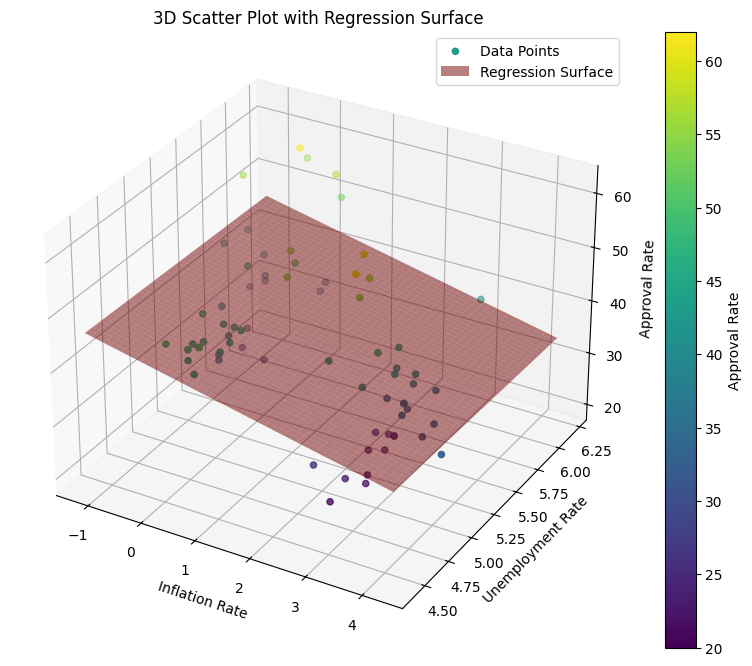

In [16]:
# Extract the data
x = dt["ifr"] # Inflation rate
y = dt["unemp"] # Unemployment rate
z = dt["appr"] # Approval rate

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
scatter = ax.scatter(x, y, z, c=z, cmap='viridis', label='Data Points')

# Create a meshgrid to plot the regression surface
x_range = np.linspace(x.min(), x.max(), 50) # create a range of x values for the surface plot
y_range = np.linspace(y.min(), y.max(), 50) # create a range of y values for the surface plot
X, Y = np.meshgrid(x_range, y_range) # create a meshgrid from the x and y ranges
Z = mod1.predict(np.array([X.flatten(), Y.flatten()]).T).reshape(X.shape) # predict z values from the flattened x and y ranges, then reshape back to the shape of the meshgrid
ax.plot_surface(X, Y, Z, alpha=0.5, color='red', label='Regression Surface')

# Labels and title
ax.set_xlabel('Inflation Rate')
ax.set_ylabel('Unemployment Rate')
ax.set_zlabel('Approval Rate')
ax.set_title('3D Scatter Plot with Regression Surface')

# Show Colorbar
fig.colorbar(scatter, label='Approval Rate')

# Show legend
ax.legend()
plt.show()